# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [16]:
data = pd.read_csv('weight-height.csv')

#subsets of the data by gender
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']


data.info() #10,000 entries 
data.head() #looks okay so let me proceed working with the dataset.
data.columns.tolist() #wwe have gender, height, weight
data.tail() #just confirming how the genders are written for the subsets above.

male_df.head()
female_df.head()
# Male Height mean: 69.02634590621737
male_height_mean = male_df['Height'].mean()
# Male Height sd: 2.8633622286606517
male_height_std = male_df['Height'].std()
# Male Weight mean: 187.0206206581929
male_weight_mean = male_df['Weight'].mean()
# Male Weight sd: 19.781154516763813
male_weight_std = male_df['Weight'].std()
# Female Height mean: 63.708773603424916
female_height_mean = female_df['Height'].mean()
# Female Height sd: 2.696284015765056
female_height_std = female_df['Height'].std()
# Female Weight mean: 135.8600930074687
female_weight_mean = female_df['Weight'].mean()
# Female Weight sd: 19.022467805319007
female_weight_std = female_df['Weight'].std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized


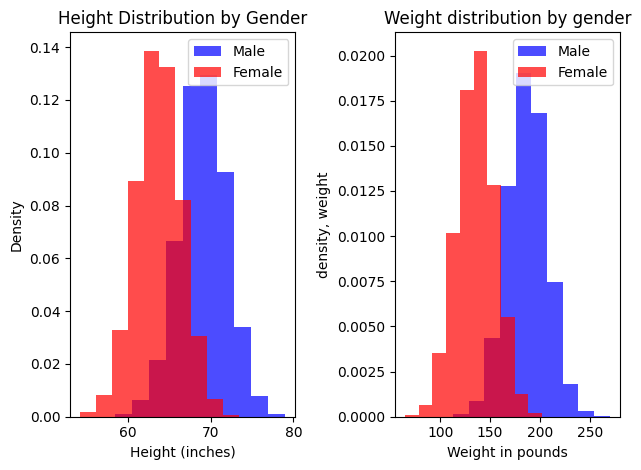

In [ ]:
# Your code here
plt.subplot(1,2,1) #This is just so that the histograms are separated well.
plt.hist(male_df['Height'], bins=10, alpha=0.7, label='Male', color='blue', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.7, label='Female', color='red', density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.title('Height Distribution by Gender')
plt.legend()

plt.subplot(1,2,2) 
plt.hist(male_df['Weight'], bins=10,alpha = 0.7, density = True, label = 'Male', color = 'blue')
plt.hist(female_df['Weight'], bins= 10, alpha = 0.7, label = 'Female', color = 'red', density=True)
plt.xlabel("Weight in pounds")
plt.ylabel("density, weight")
plt.title("Weight distribution by gender")
plt.legend()

plt.tight_layout() #to avoid a slight overlap that occurs between the 2 created histogram charts.


In [ ]:
# Record your observations - are these inline with your personal observations?
'''
    observations
    Observations from Histograms:

    Height: Clear separation between male/female distributions
    Weight: Even more pronounced difference than height
    Shape: Both appear roughly normally distributed
    Overlap: Some overlap exists, but distinct peaks

'''

In [ ]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

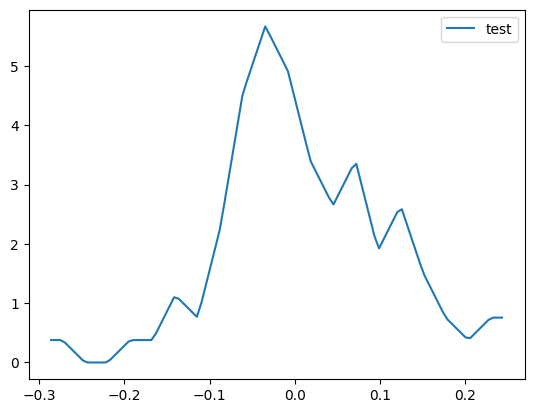

In [30]:
#we use histogram to create bins
#next, we calculate densities for each bin.
#lastly, interpolation to create smooth curves between points.
def density(x):
    counts, bin_edges = np.histogram(x, bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 

    x_smooth = np.linspace(x.min(), x.max(), 100)
    y_smooth = np.interp(x_smooth, bin_centers, counts)
    
    return x_smooth, y_smooth



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier


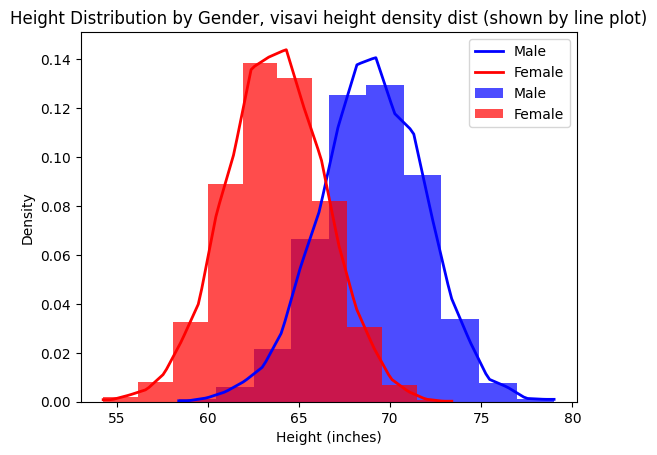

In [35]:
# Your code here 
# Calculating density curves for heights
male_height_x, male_height_y = density(male_df['Height'])
female_height_x, female_height_y = density(female_df['Height'])

# Create the plot
plt.plot(male_height_x, male_height_y, label='Male', linewidth=2, color='blue')
plt.plot(female_height_x, female_height_y, label='Female', linewidth=2, color='red')


#pasting histoograms for the overlap
plt.hist(male_df['Height'], bins=10, alpha=0.7, label='Male', color='blue', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.7, label='Female', color='red', density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.title('Height Distribution by Gender, visavi height density dist (shown by line plot)')
plt.legend()


## Repeat the above exercise for male and female weights


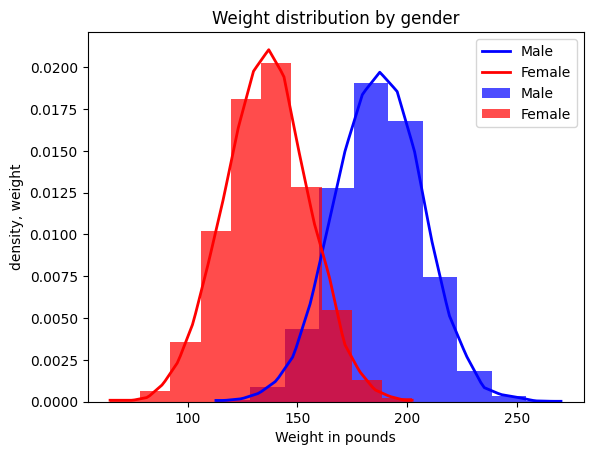

In [37]:
# Your code here 
# Calculating density curves for weights
male_weight_x, male_weight_y = density(male_df['Weight'])
female_weight_x, female_weight_y = density(female_df['Weight'])

#ploting the line graphs.
plt.plot(male_weight_x, male_weight_y, label='Male', linewidth=2, color='blue')
plt.plot(female_weight_x, female_weight_y, label='Female', linewidth=2, color='red')

#pasting the histograms for weight - both male and female
plt.hist(male_df['Weight'], bins=10,alpha = 0.7, density = True, label = 'Male', color = 'blue')
plt.hist(female_df['Weight'], bins= 10, alpha = 0.7, label = 'Female', color = 'red', density=True)
plt.xlabel("Weight in pounds")
plt.ylabel("density, weight")
plt.title("Weight distribution by gender")
plt.legend()


## Write your observations in the cell below


In [ ]:
# Record your observations - are these inline with your personal observations?
''' 
Key Observations and Insights
Height Distribution Analysis:

Separation: Clear distinction between male and female height distributions
Overlap Region: Approximately 65-67 inches where distributions overlap most
Shape: Both roughly normal (bell-shaped) distributions
Spread: Males have slightly higher variance (wider spread)
Central Tendency: Male mean is about 6 inches higher than female mean

Weight Distribution Analysis:

Greater Separation: Weight shows more pronounced differences than height
Discrimination Power: Weight is more effective for gender classification
Overlap: Less overlap compared to height distributions
Common Regions:

Females: Peak around 130-140 lbs
Males: Peak around 180-190 lbs
'''


# What is the takeaway when comparing male and female heights and weights?
#Males are taller and have more weight compared to females, from the dataset, weight-height.csv, provided.

In [ ]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results


/var/folders/qj/4dxj5bcs0fb5r9trzw3yfk4r0000gn/T/ipykernel_40800/1641280030.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_df['Height'], label='Male', color='blue', hist=False)
/var/folders/qj/4dxj5bcs0fb5r9trzw3yfk4r0000gn/T/ipykernel_40800/1641280030.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

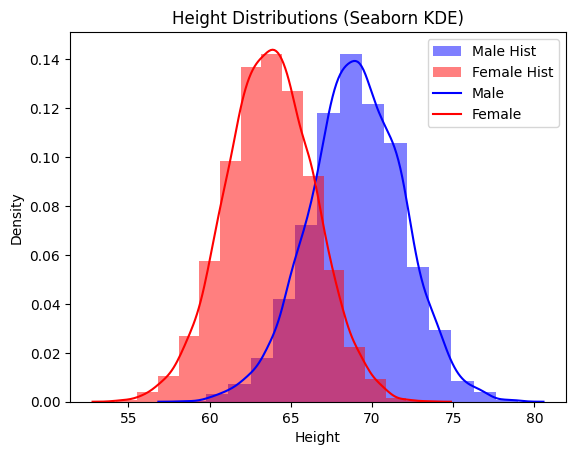

In [47]:
# Code for heights here
plt.hist(male_df['Height'], bins=15, alpha=0.5, label='Male Hist', density=True, color='blue')
plt.hist(female_df['Height'], bins=15, alpha=0.5, label='Female Hist', density=True, color='red')
sns.distplot(male_df['Height'], label='Male', color='blue', hist=False)
sns.distplot(female_df['Height'], label='Female', color='red', hist=False)
plt.title('Height Distributions (Seaborn KDE)')
plt.legend()



/var/folders/qj/4dxj5bcs0fb5r9trzw3yfk4r0000gn/T/ipykernel_40800/427070110.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_df['Weight'], label='Male', color='blue', hist=False)
/var/folders/qj/4dxj5bcs0fb5r9trzw3yfk4r0000gn/T/ipykernel_40800/427070110.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

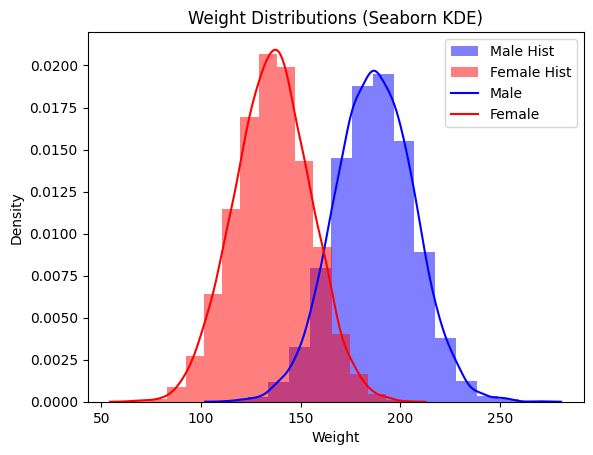

In [48]:
# Code for weights here
plt.hist(male_df['Weight'], bins=15, alpha=0.5, label='Male Hist', density=True, color='blue')
plt.hist(female_df['Weight'], bins=15, alpha=0.5, label='Female Hist', density=True, color='red')
sns.distplot(male_df['Weight'], label='Male', color='blue', hist=False)
sns.distplot(female_df['Weight'], label='Female', color='red', hist=False)
plt.title('Weight Distributions (Seaborn KDE)')
plt.legend()

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
#Yes, they are similar however, eg, when using seaborn the line plots appear more smooth compared to when using matplotlib

In [ ]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)
#Overlapping appears to work really well for this data set as I have demonstrated above

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.